In [1]:
import pandas as p
from pandas import DataFrame
import numpy as n
import matplotlib.pyplot as m
import math as math
n.random.seed(6)
from sklearn.model_selection import train_test_split

In [2]:
data = n.array([])
for x in range(1,11):
    for y in range(1,11):
        data = n.append(data,[x,y,x/y])
data = data.reshape(100,3)
n.random.shuffle(data)

In [3]:
def NoFun(x):
    return x

def NoFun_Derivative(x):
    return 1

def ReLU(x):
    return n.maximum(x,0)

def dReLU(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [4]:
#FEED FORWARDING AND BACK PROPAGATION
maxiter = 300000
#train and test data split
train, test = train_test_split(data, test_size=0.2)

XY = train[:,0:2].T
Output = train[:,2].T

#Weights
w0 = n.random.rand(3,2)
w1 = n.random.rand(5,3)
w2 = n.random.rand(4,5)
w3 = n.random.rand(5,4)
w4 = n.random.rand(1,5)

for i in range(maxiter):
    #input later
    z0 = XY
    o0 = z0

    #First hidden layer with 3 neurons
    z1 = n.matmul(w0,o0)
    o1 = ReLU(z1)

    #second hidden layer with 5 neurons
    z2 = n.matmul(w1,o1)
    o2 = ReLU(z2)

    # 3rd layer
    z3 = n.matmul(w2,o2)
    o3 = ReLU(z3)
    
    z4 = n.matmul(w3,o3)
    o4 = ReLU(z4)
    
    z5 = n.matmul(w4,o4)
    o5 = z5

    loss5 = o5 - Output
    dFun = dReLU(z5)
    lossFun = n.multiply(loss5,dFun)
    loss4 = n.matmul(w4.T, lossFun)
    d_w4 = n.matmul( lossFun, o4.T ) 

    dFun = dReLU(z4)
    lossFun = n.multiply(loss4,dFun)
    loss3 = n.matmul(w3.T, lossFun)
    d_w3 = n.matmul( lossFun, o3.T ) 

    dFun = dReLU(z3)
    lossFun = n.multiply(loss3,dFun)
    loss2 = n.matmul(w2.T, lossFun)
    d_w2 = n.matmul( lossFun, o2.T )
    
    dFun = dReLU(z2)
    lossFun = n.multiply(loss2,dFun)
    loss1 = n.matmul(w1.T, lossFun)
    d_w1 = n.matmul( lossFun, o1.T )
    
    dFun = dReLU(z1)
    lossFun = n.multiply(loss1,dFun)
    loss0 = n.matmul(w0.T, lossFun)
    d_w0 = n.matmul( lossFun, o0.T )

    eta = 0.0000001
    w0 -= eta * d_w0
    w1 -= eta * d_w1
    w2 -= eta * d_w2
    w3 -= eta * d_w3
    w4 -= eta * d_w4


In [5]:
#Testing the Weights
XY = test[:,0:2].T
Output = test[:,2].T

z0 = XY
o0 = z0

#First hidden layer with 3 neurons
z1 = n.matmul(w0,o0)
o1 = ReLU(z1)

#second hidden layer with 5 neurons
z2 = n.matmul(w1,o1)
o2 = ReLU(z2)

# 3rd layer
z3 = n.matmul(w2,o2)
o3 = ReLU(z3)

z4 = n.matmul(w3,o3)
o4 = ReLU(z4)

z5 = n.matmul(w4,o4)
o5 = z5

In [6]:
print(o3)

[[ 3.99632406  0.5618869   0.82971384  1.03007881  2.4021834   3.37516131
   0.89051033  1.13242379  0.23957296  0.20036496  0.40505492  0.16115697
   1.69855308  1.0496828   0.42465892  1.35671774  1.39592574  0.68383587
   1.51167308  0.5422829 ]
 [ 5.32292989  1.71311831  2.32833019  2.94816546  3.7601299   4.55784879
   1.4975244   3.20203193  0.76622281  0.61983528  1.12756821  0.47344775
   3.69485431  3.02135923  1.20076197  3.78295862  3.92934615  2.04017854
   2.2626055   1.63992455]
 [13.73378553  6.60470736  8.24332788 10.66561197 10.67097896 11.86749752
   4.40234547 11.43253378  3.084429    2.42228409  3.95612771  1.76013918
  12.01051786 10.99668442  4.28720017 13.29744985 13.95959476  7.70270162
   6.26863348  6.2736349 ]
 [ 3.16190874  0.40223383  0.75247627  0.88886494  1.96009064  2.6770502
   0.73761605  1.00792314  0.14332085  0.13638867  0.37450509  0.12945649
   1.49588858  0.89233103  0.37797118  1.24950565  1.25643784  0.52475813
   1.22247459  0.39876773]]


In [9]:
error = ( ( o5 - Output ) ** 2 ) / 2
MSE = n.sum(error) 
RMSE = n.sqrt(MSE) / n.size(error)
print (RMSE)

0.1211269278429196


Text(0, 0.5, 'Output')

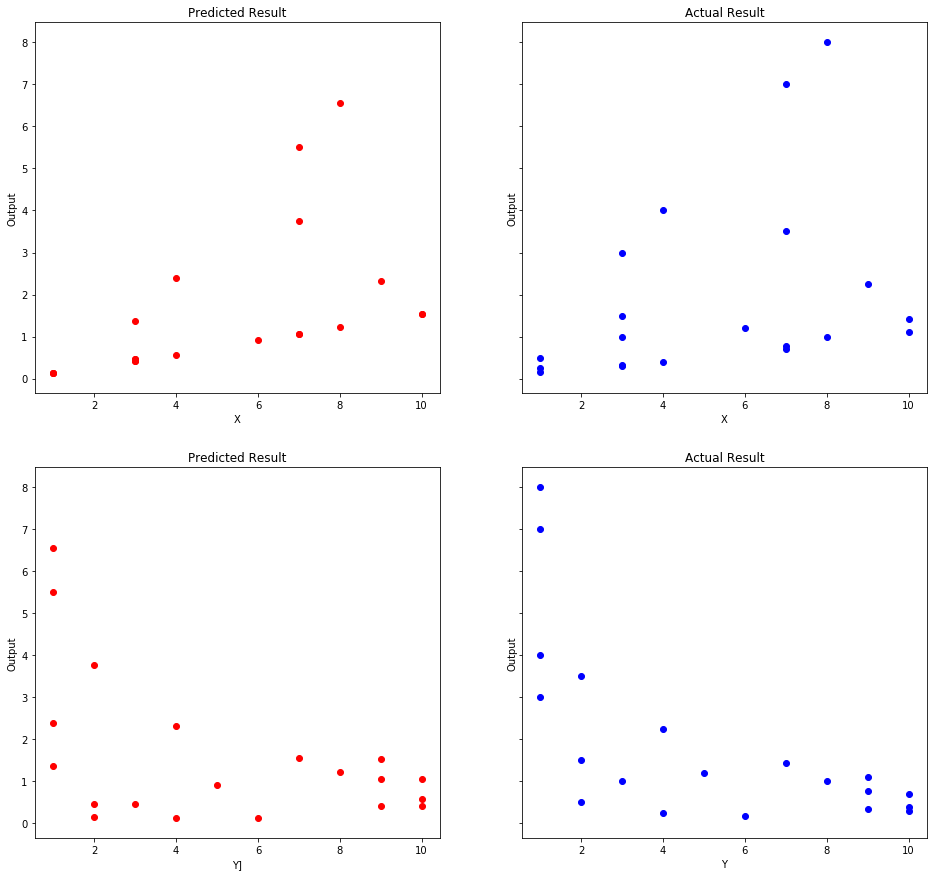

In [10]:


fig, arr = m.subplots(nrows=2, ncols=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(15)

arr[0][0].scatter (XY[0,:], o5, c='r' )
arr[0][0].set_title('Predicted Result')
arr[0][0].set_xlabel('X')
arr[0][0].set_ylabel('Output')

arr[0][1].scatter (XY[0,:], Output, c='b' )
arr[0][1].set_title('Actual Result')
arr[0][1].set_xlabel('X')
arr[0][1].set_ylabel('Output')

arr[1][0].scatter (XY[1,:], o5, c='r' )
arr[1][0].set_title('Predicted Result')
arr[1][0].set_xlabel('Y]')
arr[1][0].set_ylabel('Output')

arr[1][1].scatter (XY[1,:], Output, c='b' )
arr[1][1].set_title('Actual Result')
arr[1][1].set_xlabel('Y')
arr[1][1].set_ylabel('Output')